In [1]:
import pandas as pd
from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'ratings_small.csv')

In [3]:
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
reader = Reader(rating_scale=(1, 5))

In [5]:
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

In [6]:
algo_pmf = SVD(biased=False, random_state=42)

cv_result_pmf = cross_validate(
    algo_pmf,
    data,
    measures=['MAE', 'RMSE'],
    cv=5,
    verbose=True
)

print(cv_result_pmf)

Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7726  0.7824  0.7790  0.7768  0.7763  0.7774  0.0032  
RMSE (testset)    0.9999  1.0145  1.0050  1.0051  1.0091  1.0067  0.0049  
Fit time          0.61    0.61    0.55    0.62    0.58    0.59    0.02    
Test time         0.13    0.07    0.12    0.07    0.12    0.10    0.03    
{'test_mae': array([0.77260139, 0.78241768, 0.77904169, 0.77682816, 0.7763022 ]), 'test_rmse': array([0.99987553, 1.01450051, 1.00500798, 1.00507495, 1.00910898]), 'fit_time': (0.6086254119873047, 0.606266975402832, 0.5500080585479736, 0.6188719272613525, 0.5815331935882568), 'test_time': (0.1269998550415039, 0.0670003890991211, 0.12299990653991699, 0.06600069999694824, 0.11900115013122559)}


In [7]:
sim_options = {
    'name': 'cosine',
    'user_based': True
}

algo_user = KNNBasic(sim_options=sim_options)

cv_result_user = cross_validate(
    algo_user,
    data,
    measures=['MAE', 'RMSE'],
    cv=5,
    verbose=True
)

print(cv_result_user)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7711  0.7651  0.7631  0.7675  0.7679  0.7669  0.0027  
RMSE (testset)    0.9964  0.9893  0.9925  0.9942  0.9934  0.9932  0.0023  
Fit time          0.21    0.23    0.21    0.24    0.21    0.22    0.01    
Test time         0.66    0.66    0.74    0.66    0.74    0.69    0.04    
{'test_mae': array([0.77106897, 0.76511156, 0.76305543, 0.76745901, 0.7678947 ]), 'test_rmse': array([0.99639058, 0.98934825, 0.99254698, 0.9942284 , 0.99341646]), 'fit_time': (0.2120041

In [8]:
sim_options_item = {
    'name': 'cosine',
    'user_based': False
}

algo_item = KNNBasic(sim_options=sim_options_item)

cv_result_item = cross_validate(
    algo_item,
    data,
    measures=['MAE', 'RMSE'],
    cv=5,
    verbose=True
)

print(cv_result_item)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7700  0.7690  0.7772  0.7778  0.7760  0.7740  0.0038  
RMSE (testset)    0.9903  0.9893  1.0013  0.9948  0.9975  0.9946  0.0045  
Fit time          4.22    4.24    4.21    4.25    4.23    4.23    0.01    
Test time         2.95    3.12    3.07    3.05    3.04    3.05    0.06    
{'test_mae': array([0.76998607, 0.76898723, 0.77724872, 0.77782336, 0.77604847]), 'test_rmse': array([0.99029614, 0.98929599, 1.00126528, 0.99475889, 0.99751961]), 'fit_time': (4.2237470

### D

### E

In [9]:
similarities = ['cosine', 'msd', 'pearson']

results_user = []

for sim in similarities:
    sim_options = {
        'name': sim,
        'user_based': True
    }
    algo = KNNBasic(sim_options=sim_options)
    
    cv = cross_validate(
        algo,
        data,
        measures=['MAE', 'RMSE'],
        cv=5,
        verbose=False
    )
    
    results_user.append({
        'similarity': sim,
        'mae': cv['test_mae'].mean(),
        'rmse': cv['test_rmse'].mean()
    })

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson si

In [10]:
df_user = pd.DataFrame(results_user)
print(df_user)

  similarity       mae      rmse
0     cosine  0.768163  0.994082
1        msd  0.743651  0.967547
2    pearson  0.772876  0.999280


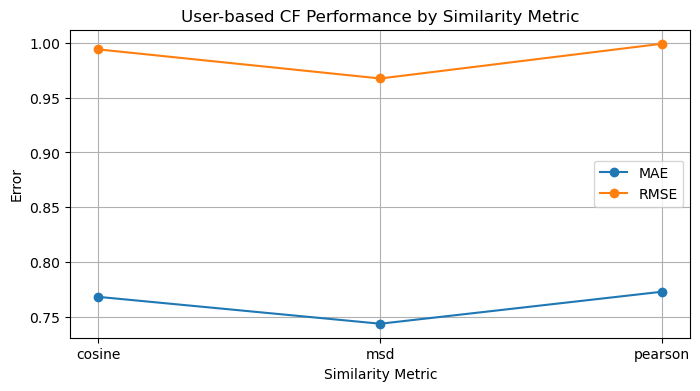

In [11]:
plt.figure(figsize=(8,4))
plt.plot(df_user['similarity'], df_user['mae'], marker='o', label='MAE')
plt.plot(df_user['similarity'], df_user['rmse'], marker='o', label='RMSE')
plt.title('User-based CF Performance by Similarity Metric')
plt.xlabel('Similarity Metric')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
results_item = []

for sim in similarities:
    sim_options = {
        'name': sim,
        'user_based': False
    }
    algo = KNNBasic(sim_options=sim_options)
    
    cv = cross_validate(
        algo,
        data,
        measures=['MAE', 'RMSE'],
        cv=5,
        verbose=False
    )
    
    results_item.append({
        'similarity': sim,
        'mae': cv['test_mae'].mean(),
        'rmse': cv['test_rmse'].mean()
    })

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson si

In [13]:
df_item = pd.DataFrame(results_item)
print(df_item)

  similarity       mae      rmse
0     cosine  0.775731  0.995981
1        msd  0.722152  0.935667
2    pearson  0.767839  0.989123


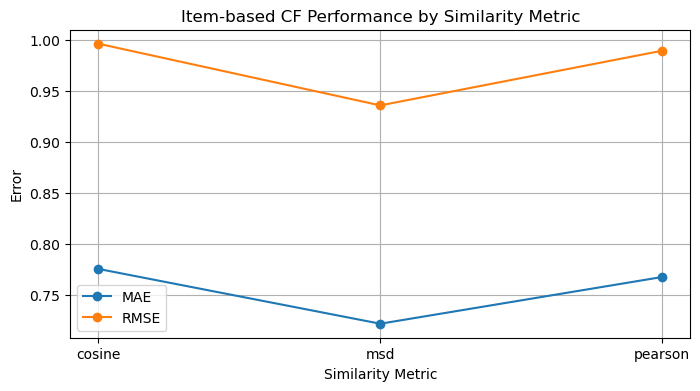

In [14]:
plt.figure(figsize=(8,4))
plt.plot(df_item['similarity'], df_item['mae'], marker='o', label='MAE')
plt.plot(df_item['similarity'], df_item['rmse'], marker='o', label='RMSE')
plt.title('Item-based CF Performance by Similarity Metric')
plt.xlabel('Similarity Metric')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

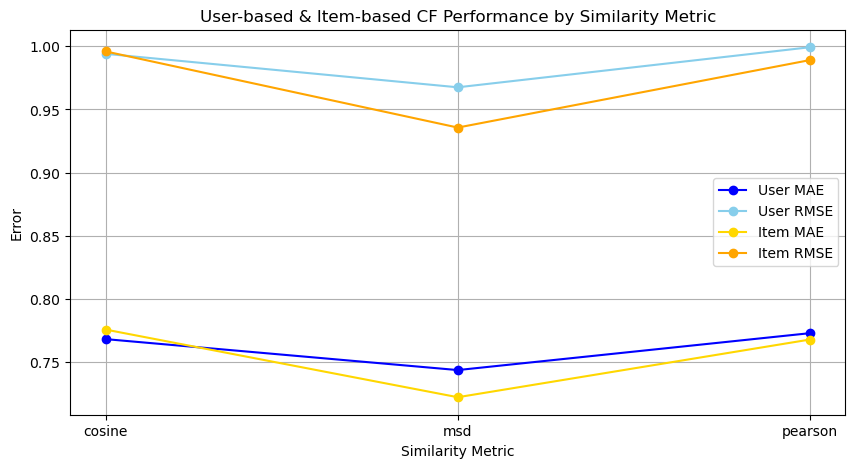

In [22]:
plt.figure(figsize=(10,5))

plt.plot(df_user['similarity'], df_user['mae'], marker='o', label='User MAE', color='blue')
plt.plot(df_user['similarity'], df_user['rmse'], marker='o', label='User RMSE', color='skyblue')

plt.plot(df_item['similarity'], df_item['mae'], marker='o', label='Item MAE', color='gold')
plt.plot(df_item['similarity'], df_item['rmse'], marker='o', label='Item RMSE', color='orange')

plt.title('User-based & Item-based CF Performance by Similarity Metric')
plt.xlabel('Similarity Metric')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
ks = [5, 10, 20, 40, 60, 80]

user_results = []

for k in ks:
    sim_options = {
        'name': 'msd',
        'user_based': True
    }
    algo_user_k = KNNBasic(k=k, min_k=1, sim_options=sim_options)
    
    cv = cross_validate(
        algo_user_k,
        data,
        measures=['MAE', 'RMSE'],
        cv=5,
        verbose=False
    )
    
    user_results.append({
        'k': k,
        'mae': cv['test_mae'].mean(),
        'rmse': cv['test_rmse'].mean()
    })

df_user_k = pd.DataFrame(user_results)
print(df_user_k)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [16]:
item_results = []

for k in ks:
    sim_options = {
        'name': 'msd',
        'user_based': False
    }
    algo_item_k = KNNBasic(k=k, min_k=1, sim_options=sim_options)
    
    cv = cross_validate(
        algo_item_k,
        data,
        measures=['MAE', 'RMSE'],
        cv=5,
        verbose=False
    )
    
    item_results.append({
        'k': k,
        'mae': cv['test_mae'].mean(),
        'rmse': cv['test_rmse'].mean()
    })

df_item_k = pd.DataFrame(item_results)
print(df_item_k)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

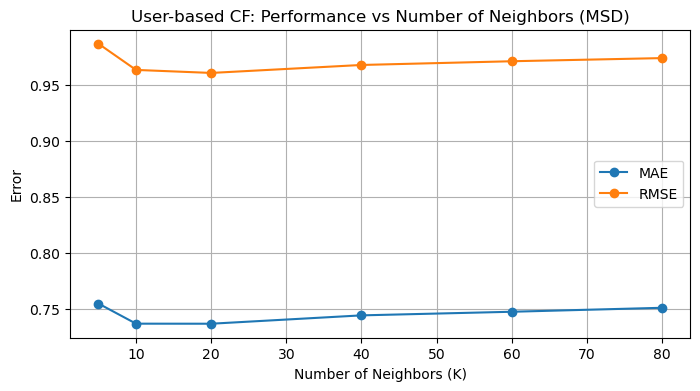

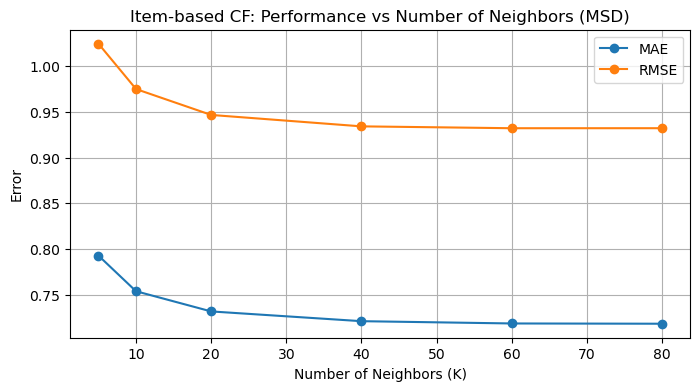

In [17]:
plt.figure(figsize=(8,4))
plt.plot(df_user_k['k'], df_user_k['mae'], marker='o', label='MAE')
plt.plot(df_user_k['k'], df_user_k['rmse'], marker='o', label='RMSE')
plt.title('User-based CF: Performance vs Number of Neighbors (MSD)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(df_item_k['k'], df_item_k['mae'], marker='o', label='MAE')
plt.plot(df_item_k['k'], df_item_k['rmse'], marker='o', label='RMSE')
plt.title('Item-based CF: Performance vs Number of Neighbors (MSD)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
ks = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

user_results = []

for k in ks:
    sim_options = {
        'name': 'msd',
        'user_based': True
    }
    algo_user_k = KNNBasic(k=k, min_k=1, sim_options=sim_options)
    
    cv = cross_validate(
        algo_user_k,
        data,
        measures=['MAE', 'RMSE'],
        cv=5,
        verbose=False
    )
    
    user_results.append({
        'k': k,
        'mae': cv['test_mae'].mean(),
        'rmse': cv['test_rmse'].mean()
    })

df_user_k = pd.DataFrame(user_results)
print(df_user_k)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [24]:
ks = [60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80]

item_results = []

for k in ks:
    sim_options = {
        'name': 'msd',
        'user_based': False
    }
    algo_item_k = KNNBasic(k=k, min_k=1, sim_options=sim_options)
    
    cv = cross_validate(
        algo_item_k,
        data,
        measures=['MAE', 'RMSE'],
        cv=5,
        verbose=False
    )
    
    item_results.append({
        'k': k,
        'mae': cv['test_mae'].mean(),
        'rmse': cv['test_rmse'].mean()
    })

df_item_k = pd.DataFrame(item_results)
print(df_item_k)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

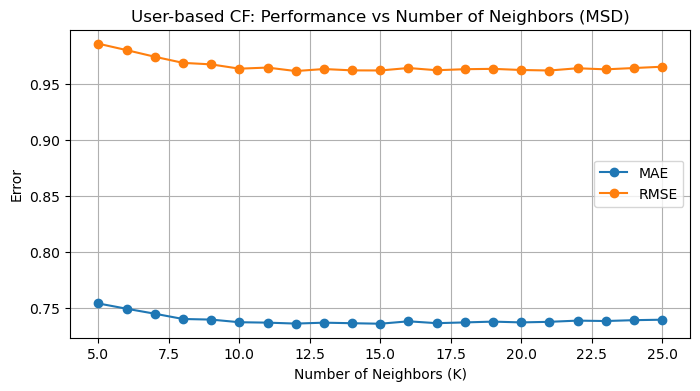

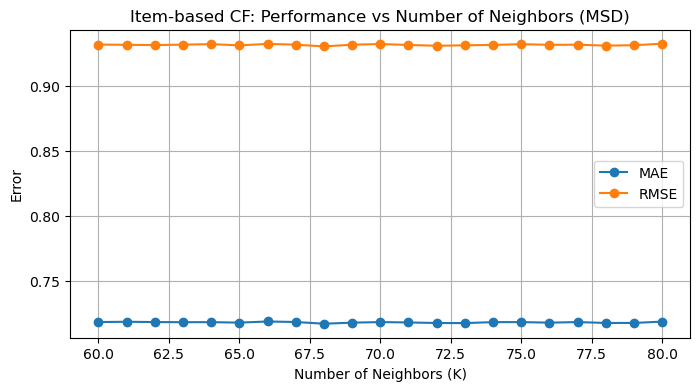

In [25]:
plt.figure(figsize=(8,4))
plt.plot(df_user_k['k'], df_user_k['mae'], marker='o', label='MAE')
plt.plot(df_user_k['k'], df_user_k['rmse'], marker='o', label='RMSE')
plt.title('User-based CF: Performance vs Number of Neighbors (MSD)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(df_item_k['k'], df_item_k['mae'], marker='o', label='MAE')
plt.plot(df_item_k['k'], df_item_k['rmse'], marker='o', label='RMSE')
plt.title('Item-based CF: Performance vs Number of Neighbors (MSD)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()